In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the data from CSV
data = pd.read_csv(r'/content/Mall_Customers.csv')

# Display the first few rows of the data to understand its structure
print(data.head())

# Step 2: Preprocessing
# Drop any non-numeric columns that are irrelevant for clustering
data_clean = data.drop(['CustomerID', 'Gender'], axis=1)  # Assuming 'CustomerID' and 'Gender' are non-numeric

# Handling missing values (if any)
data_clean = data_clean.dropna()

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


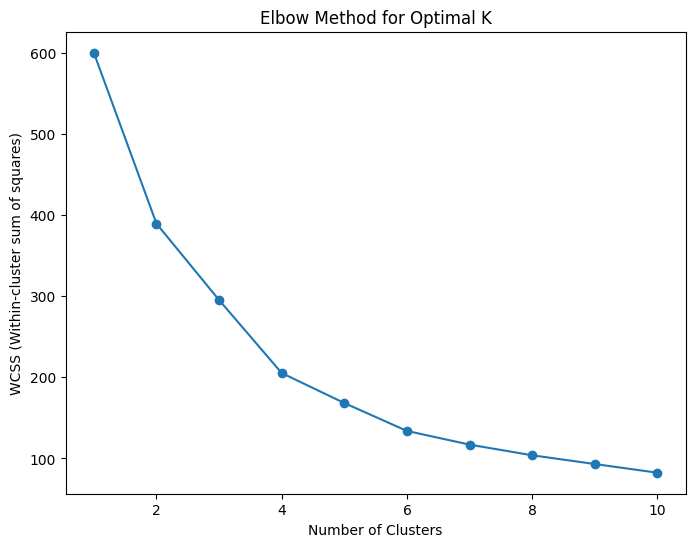

In [3]:
# Step 3: Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

In [4]:
# Step 4: Apply K-means with optimal K (let's assume K=3 based on the Elbow graph)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Add the cluster labels to the original dataset
data['Cluster'] = y_kmeans

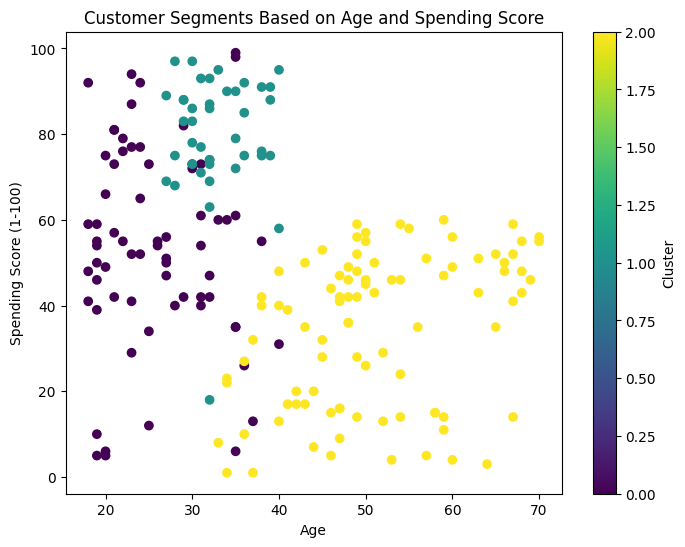

In [5]:
# Step 6: Visualizing the Clusters (2D Plot of Age vs Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

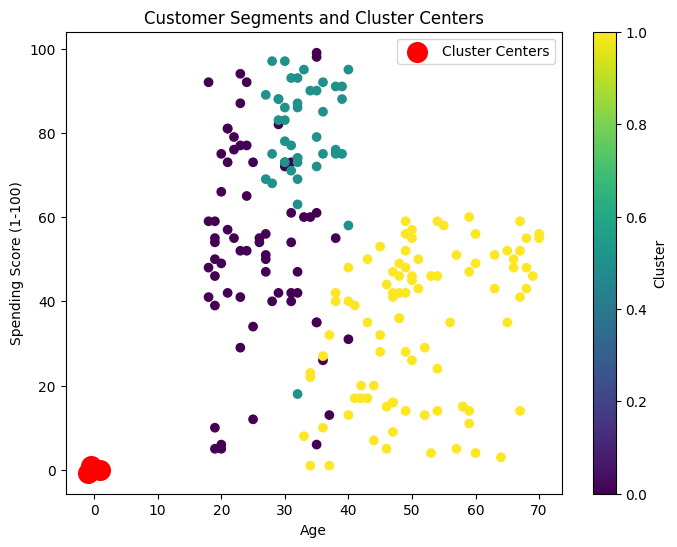

In [6]:
# Step 7: Visualize Cluster Centers
centers = kmeans.cluster_centers_

# Plotting the cluster centers in the 2D Age vs Spending Score plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('Customer Segments and Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


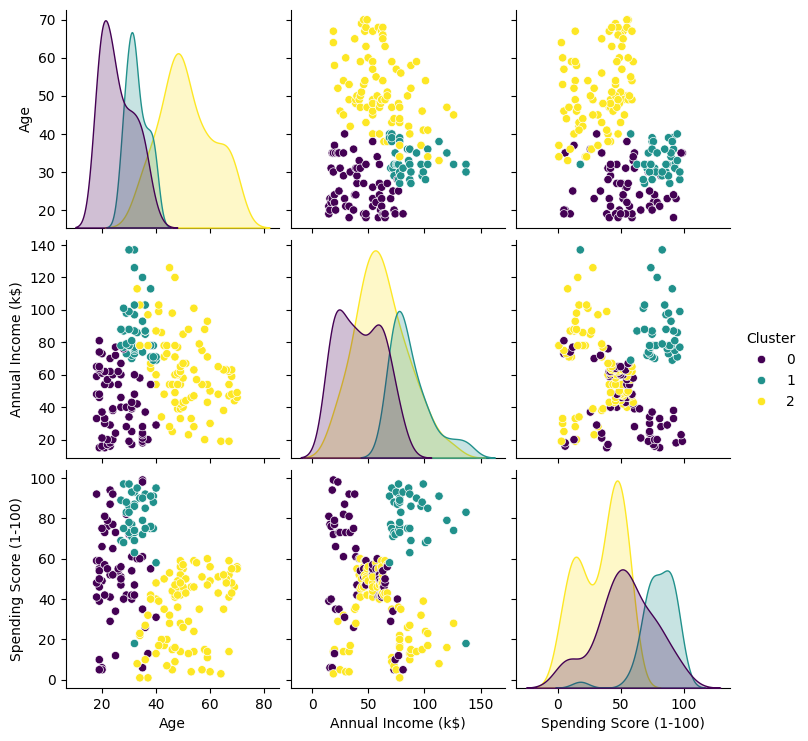

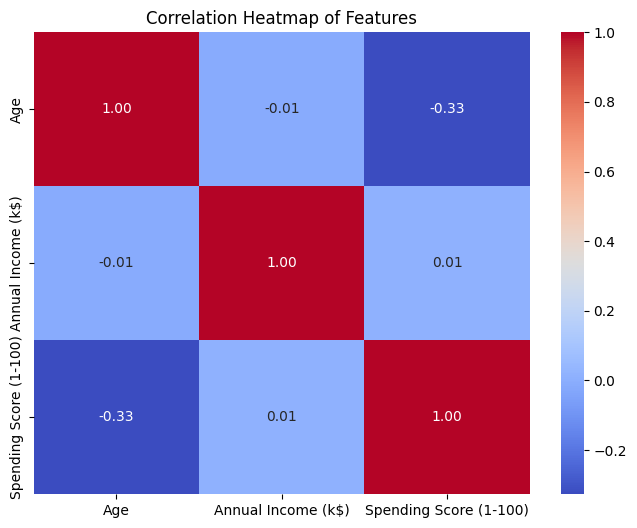

In [7]:
# Step 8: Visualize the relationships between features using Pairplot (if features are few)
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Step 9: Heatmap of Feature Correlations
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [8]:
# Step 10: Silhouette Score for Evaluating Clustering Quality
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.358
